### PYTHON MACHINE LEARNING ASSIGNMENT

#### Pawan Rakesh Kumar Narayan Gowda
#### 19250809
#### NCG613: Data Analytics Project

The Project focus on predicting the house price in london for Average floor area, Floor area of 75 square metres and houses with Floor area of 125 sqaure metres and also create a 3D plot for the same. There is a package in python called "Sklearn" which includes some machine learning algorithms and functions that could be helpful. This package is somehow connected to numpy, scipy, data management and graph plotting packages.A cross-validated K-nearest neighbour machine learning algorithm will be used.

In [ ]:
import numpy as np
import pandas as pd

Python has various packages which can be imported based on the requirement. 
For instance,

#### NumPy
is the package for scientific computing with Python. It contains among other things: a powerful N-dimensional array object and sophisticated functions. 

#### pandas
is a fast, powerful, flexible and use for source data analysis and for the data manipulation.

#### sklearn
package is used to perform machine learning techniques in python. sklearn package is designed to work in conjunction with numpy, scipy and various other data management packages.

In [3]:
hp = pd.read_csv('hpdemo.csv',dtype=float)

First, we are reading the source file "hpdemo.csv" using the pandas. 

The file hpdemo.csv has house price list of various houses based on floor area and location variables. The location variables are "east" and "north" and "fl_area" is the floor area variable. it has 5 columns and 1405 rows. Properties are given a unique ID stored in coulmn  "ID".  

The main aim is to predict the house price using the variable east, north and fl_area using Machine Learning algorithms in python.

From the below result we can see the data in hpdemo.csv

In [4]:
print(hp)


          ID      east     north     price  fl_area
0        1.0  523800.0  179700.0  107000.0     50.0
1        2.0  533200.0  170900.0   55500.0     66.0
2        3.0  514600.0  175800.0  103000.0     90.0
3        4.0  516000.0  171000.0  187000.0    125.0
4        5.0  533700.0  169200.0   43000.0     50.0
...      ...       ...       ...       ...      ...
1400  1401.0  515600.0  173100.0   68500.0     44.0
1401  1402.0  513200.0  186500.0   58500.0     59.0
1402  1403.0  542900.0  189500.0  247000.0    185.0
1403  1404.0  524900.0  185300.0  153000.0     96.0
1404  1405.0  522000.0  185400.0  146250.0    111.0

[1405 rows x 5 columns]


#### MACHINE LEARNING TECHNIQUE:

There are various stages to carryout Machine Learning process for supervised learning in python. They are:

1. Data Preparation
2. Choice of ML algorithm
3. Identification of tuning parameters
4. Identification of prediction scoring measure
5. Choice of tuning parameters to optimise scoring measure


#### Data Preparation: (Scaling the Data)

A number of Machine Learning algorithms make use of the idea of distance  in attribute space. Sometimes each of these attributes of the data are in different units. Data is often re-scaled(or scaled) prior to applying Machine Learning algorithms. This is accomplished either by computing the z-scores or rescaling by minimum and maximum values. 

In this Dataset, location variable "east" and "north" are of type metres whereas "fl_area" is in square metres. So, these variables need to be scaled to common units. 
    
In our example, 
Data is scaled  using z-scores which transforms each of the variables to have mean 0 and standard deviation 1.


#### Data Scaling in sklearn

Standardscaler() function is used for scaling the data which is available in sklearn package This function also creates a python object that will do scaling for set of variables.
Here "x_scaler" is the object created and the attributes being scaled are east, north, fl_area.

In [10]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()

Here the "x_scaler" object  is calibrated using fit model and then it is transformed to z-scores using transform funtion. The array X contains the z-score rescaled coulmns.

In [11]:
x_scaler.fit(hp[['east','north','fl_area']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X = x_scaler.transform(hp[['east','north','fl_area']])

In [15]:
print(X[:6,:])

[[-0.46109525 -0.0036912  -1.16501944]
 [ 0.39051366 -1.02696462 -0.73029338]
 [-1.29458482 -0.45718737 -0.07820428]
 [-1.16774945 -1.01533651  0.87275899]
 [ 0.435812   -1.22464244 -1.16501944]
 [ 1.72228503  1.1474914   0.05764762]]


#### Choosing a Machine Learning Algorithm
    
    
There are many  Machine Learning Algorithm available.The type and kind of data we have plays a key role in deciding which algorithm to use.Certain algorithms work with certain types of data. We make use of K-nearest Neighbour Model because normally house prices are estimated by agents, sellers or buyers based onthe house prices of near by houses.
    
Since house price is being predicted, a supervised learning algorithm should be used and with house prices being quantitative, a regression algorithm is choosen. 

#### Identifying Tuning Parameters

K-nearest neighbour algorithm is used, Tuning parameters has to be defined to find out the best fitting model. Tuning parameters used in this example are:

>Number of nearest neighbours (k).

>Where to use a distance weighted mean or uniform weighted mean as a predictor from the k nearest neighbour values.

>Distace metric to use: Euclidean (p=2) or City Block (p=1).

Both Euclidean and City Block are cases of Minkowski Metrics. In the Euclidean metric, the distance between two points is the length of a straight line joining them, whilst for City Block, it is the distance travelled in the x direction, plus the distance travelled in the y direction. 
KNeighborsRegressor is imported from sklearn package.

#### Choice of Scoring Method

For supervised machine learning, the goal is to take a matrix of predictor variables X and a response variable to be predicted y and find some function f(X) such that f(X) is as close to y as possible. Scoring function is a function that measures how close f(X) manages to get to Y. This is measured by using mean absolute error (MAE), where smaller values of MAE refers to best model.


In this example, two functions are imported from sklearn.metrics package for scoring purpose, make_scorer which creates the scoring object, mean_absolute_error which specifies the kind of scorer to use. An actual scoring object called mae is created using these functions.

#### Running the ML Algorithm


Import the KNeighborsRegressor function from the sub-package sklearn.neighbors 

NN is actually a function to produce nearest neighbour regression objects. 
with k=6 euclidean distance metric and uniform mean weighting.

In [16]:
from sklearn.neighbors import KNeighborsRegressor as NN


In [17]:
reg_object = NN(n_neighbors=6,weights='uniform',p=2)

The regression object (reg_object) has a fit method, takes argument predictor matrix X and the quantity to be predictedis hosue price and fits the regression. a new array price will have house price data copied from dataframe hp. 

In [18]:
price = hp['price']/1000.0
reg_object.fit(X,price)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

"reg_object"  now predicts  the price of a house given its location and floor area. to predict the price of a house whose grid reference is 523800E 179750N, floor area is 55 sq metres. 


It is also important to rescale the  predictor values before being fed into the regression model. This is all done below:

The predicted price is 128.5 thousand pounds.

In [20]:
predicted_price = reg_object.predict(x_scaler.transform([[523800.0,179750.0,55.0]]))
print(predicted_price)

[128.5]


##### Choice of tuning parameters to optimise scoring measure:
    
One of the simplest approaches of finding optimum tuning parameters is to iterate across all possible combinations of tuning parameters, apply cross validation procedure for each combination of values and select the combination that is best fit. This process is called as cross validation grid search.

Cross-Validation is a technique where a subset of the full data set called the training set is used to develop the model. 
Cross validation grid search is symmetrical because it computes two cross validation scores, one with the original training & test dataset and other by swapping the training & test dataset, and the average of the two scores is taken. 

Import two functions from sklearn.metrics, make_scorer which creates the scoring object, and mean_absolute_error which specifies the kind of scorer to use. 
The greater_is_better=False argument is used to specify that in this case lower scores correspond to better models.

In [21]:
from sklearn.metrics import mean_absolute_error, make_scorer
mae = make_scorer(mean_absolute_error, greater_is_better=False)

We also use of GridSearchCV function, it takes a number of arguments like estimatorwhich specfies the ML algorithm that is used, scoring specifies scoring method and param_grid is a dictionary. 

opt_nn will value returned by each combination of items in the dictionary will be tested, and combination with the best MAE will be selected.

We then fit the model.

In [22]:
from sklearn.model_selection import GridSearchCV
opt_nn = GridSearchCV(
    estimator = NN(),
    scoring = mae,
    param_grid = {
        'n_neighbors':range(1,35),
        'weights':['uniform','distance'],
        'p':[1,2]})

In [23]:
opt_nn.fit(X,price)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 35), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [24]:
predicted_hp = opt_nn.predict(
    x_scaler.transform([[523800.0,179750.0,55.0]]))
print(predicted_hp)

[122.53520623]


The opt_nn performs fit using data X and price ,it also performs a full cross- validation search.

In addition to this, to understand the tunning parameters that were chosen in optimal model and the MAE score,An attribute of opt_nn called "best_estimator_" provides the regression model that performed best - and this has a method called get_params which returns the dictionary containing the tuning parameters as below output.

There is another attribute of opt_nn called "best_score_" which returns the actual score.

In [25]:
print(opt_nn.best_estimator_.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 16, 'p': 1, 'weights': 'distance'}


In [26]:
print(opt_nn.best_score_)

-26.44326967264284


the negative sign on the bestscore arises as the algorithm tries to optimise the score.

It is also observed that optimal parameters are: 21 nearest neighbours, based on a city block metric where (p=1). distnace weighted mean as a predictor. and the MAE is around 26.7 thousand pounds.


In [27]:
def print_summary(opt_reg_object):
    params = opt_reg_object.best_estimator_.get_params()
    score = - opt_reg_object.best_score_
    print("Nearest neighbours: %8d" % params['n_neighbors'])
    print("Minkowski p       : %8d" % params['p'])
    print("Weighting         : %8s" % params['weights'])
    print("MAE Score         : %8.2f" % score)
    return

In [28]:
print_summary(opt_nn)

Nearest neighbours:       16
Minkowski p       :        1
Weighting         : distance
MAE Score         :    26.44


##### Pipelines

Normal model fitting algorithm involves scaling of data, then application of ML algorithm and then prediction of response. Scaling alone involves creating a scaler object, calibrating model using fit function and then transforming variables to z-scores. We need to perform these operations manually.

Pipelines contains whole process including the scaling, calibrating models and make predictions directly using the original data. To use pipeline, a function called pipeline has to be imported from sklearn.pipeline package.
    

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
pipe = Pipeline([('zscores',StandardScaler()),
    ('NNreg',NN(n_neighbors=6,weights='uniform',p=2))])

In the above Code, an object "pipe" is created which have operations of the pipeline stored in that. "pipe" is used to fit and predict. "pipe" will scale the data in the first zscores block of the pipeline before passing this scaled data to the subsequent NNreg block of the pipeline. 

In [32]:
pipe.fit(hp[['east','north','fl_area']],price)

Pipeline(memory=None,
         steps=[('zscores',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('NNreg',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=6, p=2,
                                     weights='uniform'))],
         verbose=False)

In [33]:
print(pipe.predict([[523800.0,179750.0,55.0]]))

[128.5]


Earlier we used the GridSearchCV method to find out the best tuning parameters for the model. in Pipelines a
"pipe" variable is being created using pipeline function that performs bothscaling and applying nearest neighbour machine learning algorithm.

In [34]:
pipe = Pipeline([('zscores',StandardScaler()),('NNreg',NN())])

opt_nn2 = GridSearchCV(
    estimator = pipe,
    scoring = mae,
    param_grid = {
        'NNreg__n_neighbors':range(1,35),
        'NNreg__weights':['uniform','distance'],
        'NNreg__p':[1,2]})

Object created from pipeline acts like a regression model. It has predict and fit methods linked to it. Fitting the model using the object "opt_nn2" created above:

"opt_nn2" object created from above code has both fit and predict methods 

In [36]:
opt_nn2.fit(hp[['east','north','fl_area']],price)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('zscores',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('NNreg',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
            

Using the object opt_nn2 the house price is predicted.

In [37]:
print(opt_nn2.predict([[523800.0,179750.0,55.0]]))

[122.53520623]


In [38]:
def print_summary2(opt_pipe_object):
    params = opt_pipe_object.best_estimator_.get_params()
    score = - opt_pipe_object.best_score_
    print("Nearest neighbours: %8d" % params['NNreg__n_neighbors'])
    print("Minkowski p       : %8d" % params['NNreg__p'])
    print("Weighting         : %8s" % params['NNreg__weights'])
    print("MAE Score         : %8.2f" % score)
    return

In [39]:
print_summary2(opt_nn2)

Nearest neighbours:       16
Minkowski p       :        1
Weighting         : distance
MAE Score         :    26.42


#### Visulaising the Result:

With help of meshgrid function, we are now creating a grid for the input data 100X100 grid for easting from 505000 to 555800 and 100X100 grid for northings from 158400 and 199900. 

In [40]:
east_mesh, north_mesh = np.meshgrid(
    np.linspace(505000,555800,100),
    np.linspace(158400,199900,100))

To create a grid for the floor area, First we create a grid of same size as for easting and northings with zero values

In [41]:
fl_mesh = np.zeros_like(east_mesh)

Now we assign average value of the floor area in the dataset to every element of the grid.


In [42]:
fl_mesh[:,:] = np.mean(hp['fl_area'])

In [43]:
print(east_mesh.shape)

(100, 100)


In [44]:
print(north_mesh.shape)


(100, 100)


In order to predict, each attribute must be provided in proper format. ravel function is used to unravel the three atrributes and set them in required format in order to carry out the predictions.

In [ ]:
grid_predictor_vars = np.array([east_mesh.ravel(),
    north_mesh.ravel(),fl_mesh.ravel()]).T 

In [46]:
hp_pred = opt_nn2.predict(grid_predictor_vars)

To predict the house proce the attributes were unravelled with ravel function. Now, the hp_red has house prices in different form, To visualise the data, the data has to be converted again into grid format. This is done using the function reshape.

In [47]:
hp_mesh = hp_pred.reshape(east_mesh.shape)

mpl_toolkits.mplot function is used to create 3D plots of predicted house prices.

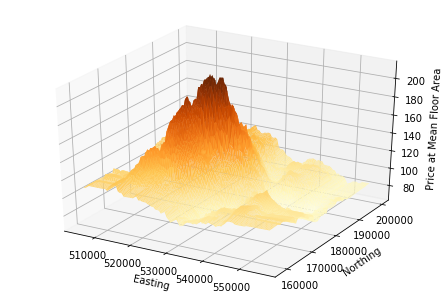

In [48]:
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

fig = pl.figure()
ax = Axes3D(fig)
ax.plot_surface(east_mesh, north_mesh, hp_mesh, rstride=1, cstride=1, cmap='YlOrBr',lw=0.01)
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
ax.set_zlabel('Price at Mean Floor Area')
pl.show()

From the above 3D plot, It is evident that for average floor area the highest price is around 175k pounds.

To create a 3D plot with floor area 75 and 125, a function is defined, This function takes a pipeline and floor area level as parameters

In [1]:
def surf3d(pipe_model,fl_area):
    east_mesh, north_mesh = np.meshgrid(
        np.linspace(505000,555800,100),
        np.linspace(158400,199900,100))
    fl_mesh = np.zeros_like(east_mesh)
    fl_mesh[:,:] = fl_area
    grid_predictor_vars = np.array([east_mesh.ravel(),
        north_mesh.ravel(),fl_mesh.ravel()]).T
    hp_pred = pipe_model.predict(grid_predictor_vars)
    hp_mesh = hp_pred.reshape(east_mesh.shape)
    fig = pl.figure()
    ax = Axes3D(fig)
    ax.plot_surface(east_mesh, north_mesh, hp_mesh, 
        rstride=1, cstride=1, cmap='YlOrBr',lw=0.01)
    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')
    ax.set_zlabel('Price at Mean Floor Area')
    pl.show()
    return

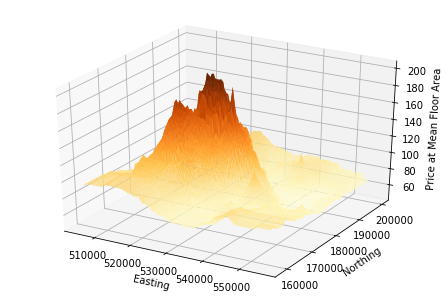

In [53]:
pl.close()
surf3d(opt_nn2,75.0)
pl.show()


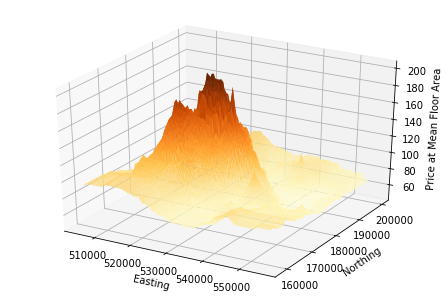

In [54]:
pl.close()
surf3d(opt_nn2,125.0)
pl.show()


#### Plot Observartions:

Each of the 3D plot shows the predicted house prices for given atttributes like easting, northing location and floor area  in London. The darker colors represent maximum price locations whereas lighter color represent minimum prices for all the 3 floor areas.


>The price range of house in London starts from 100k pounds for 125 sq-mtrs, 70k pounds for average floor area of 92.88 sq-mtrs and 50k pounds for 75 sq-mtrs.

>The highest predicted price with average floor area is around 180 thousand pounds at location between 520000-530000E and 180000-200000N. Also, house prices decreases on moving further more towards east after 520000E.

>The maximum house price for 125 sq-mtrs floor area is 230k pounds, for average floor area (92.88 sq-mtrs) it is nearly 180k pounds and for 75 sq-mtrs it is 160k pounds.House price tends to increase with price.

>The maximum price location for all 3 house size categories is roughly at same location between 520000-530000E and approximately 180000-190000N.

>House prices drop off dramatically for all house sizes as you move further away in any direction from this central peak location before bottoming out and rising slightly in some of the outer suburbs.

>The lowest prices location for each of the house sizes is between 530000-540000E and approxiamtely 190000-20000N.


In [51]:
from sklearn.decomposition import PCA
pipe = Pipeline([('zscores',StandardScaler()),
    ('prcomp',PCA()),
    ('NNreg',NN())])
opt_nn3 = GridSearchCV(
    estimator = pipe,
    scoring = mae,
    param_grid = {
        'NNreg__n_neighbors':range(1,35),
        'NNreg__weights':['uniform','distance'],
        'NNreg__p':[1,2],
        'prcomp__n_components':[1,2,3]})
opt_nn3.fit(hp[['east','north','fl_area']],price)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('zscores',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('prcomp',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('NNreg',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='m

In [55]:
print(opt_nn3.best_estimator_.get_params()['prcomp__n_components'])

3


In [56]:
print(opt_nn3.best_score_)

-26.57986647550664


#### CONCLUSION:

From this analysis, 
We can conclude that predicted housr price is not only dependent on attributes like easting, northing and floor are but also it is dependent on multiple other factors used by K nearest neighbour algorithm. hence this causes variations  which we can observe in 3D plots. 
